In [3]:
import numpy as np
import pandas as pd

# two-class classification
data_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', dtype = None, delimiter=';')
data_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', dtype = None, delimiter=';')

In [4]:
# pandas class -> numpy ndarray
X0 = data_red.to_numpy()
X1 = data_white.to_numpy()

N0,D = X0.shape
N1,D = X1.shape

# target value
t0 = np.zeros(N0, dtype = int) # red wine = 0
t1 = np.ones(N1, dtype = int) # white wine = 1

# 전체 dataset
X = np.vstack((X0, X1)) # input, 12차원의 입력
t = np.hstack((t0, t1)) # output, {0, 1} 구분, two-class

# normalization, 
Xmin = np.min(X, axis = 0)
Xmax = np.max(X, axis = 0)
X = (X - Xmin) / (Xmax - Xmin)
# X ~ [0, 1]

N,D = X.shape
print(X.shape)

(6497, 12)


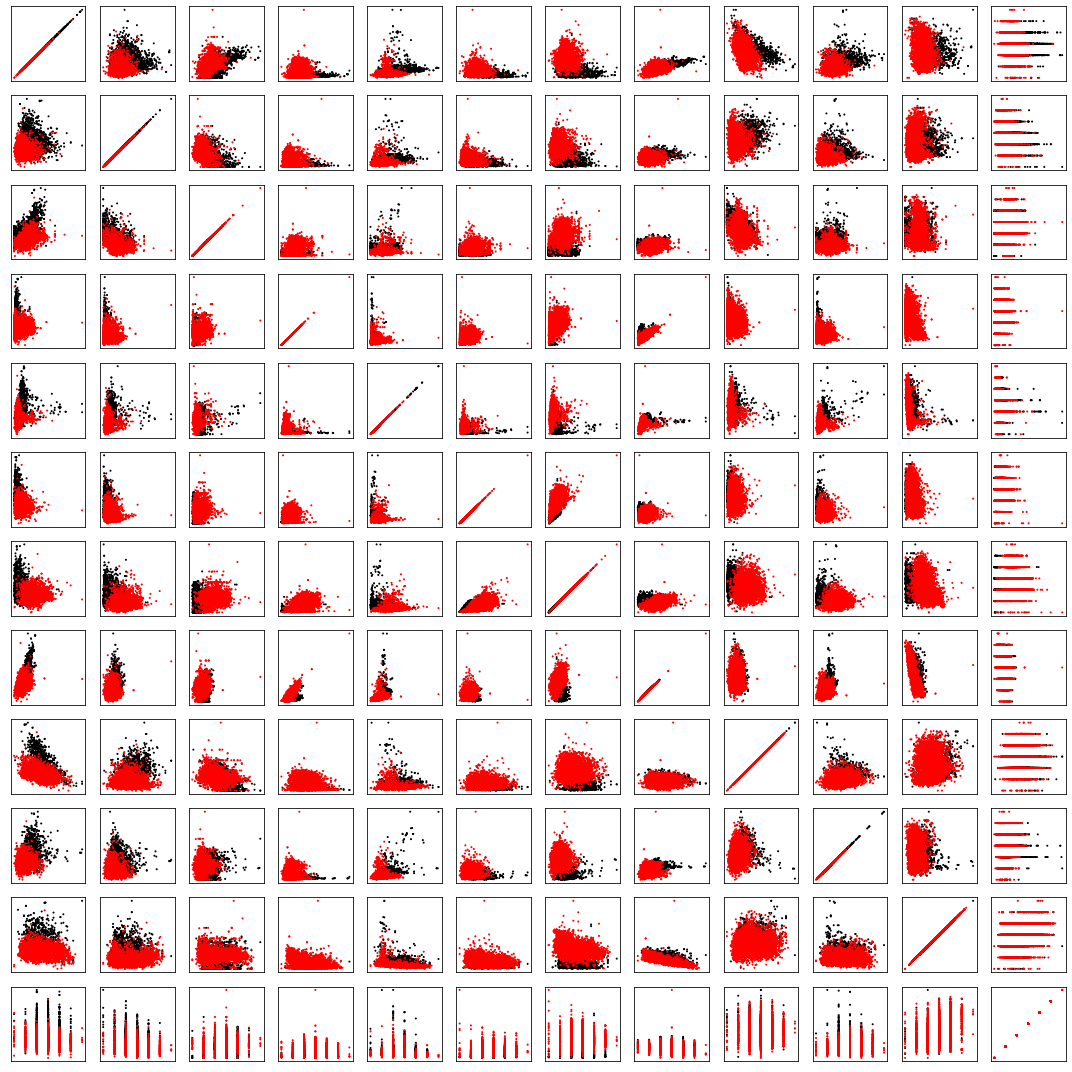

In [6]:
import matplotlib
import matplotlib.pyplot as plt

cmap_sample = matplotlib.colors.ListedColormap(['black', 'red'])

plt.figure(figsize = (15,15))
for i in range(0,D):
    for j in range(0,D):
        plt.subplot(D,D,i*D + j + 1)
        plt.scatter(X[:,i],X[:,j], c = t, s = 1, cmap = cmap_sample, vmin = 0, vmax = +1)
        
        ax = plt.gca()
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)

plt.tight_layout()

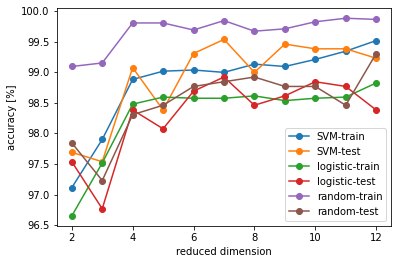

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C = np.cov(X, rowvar = False)

U,s,V = np.linalg.svd(C)
S = np.diag(s)
V = V.T

svm_train = []
svm_test  = []
log_train = []
log_test  = []
rf_train = []
rf_test = []

for D_reduce in range(2,13):
    X2Z = U[:,:D_reduce]
    Z = X.dot(X2Z)

    model_svm = svm.SVC() # radial basis function
    model_log = LogisticRegression()
    model_rf = RandomForestClassifier(n_estimators = 10, max_depth = 10)

    Z_train, Z_test, t_train, t_test = train_test_split(Z, t, test_size = 0.20)

    N_train,D_train = Z_train.shape
    N_test,D_test = Z_test.shape

    # 학습
    model_svm.fit(Z_train, t_train)
    model_log.fit(Z_train, t_train)
    model_rf.fit(Z_train, t_train)

    # 예측
    t_svm_train = model_svm.predict(Z_train)
    t_log_train = model_log.predict(Z_train)
    t_rf_train = model_rf.predict(Z_train)
    t_svm_test = model_svm.predict(Z_test)
    t_log_test = model_log.predict(Z_test)
    t_rf_test = model_rf.predict(Z_test)

    # accuracy
    svm_train.append( accuracy_score(t_train, t_svm_train) )
    svm_test.append(  accuracy_score(t_test,  t_svm_test)  )

    log_train.append( accuracy_score(t_train, t_log_train) )
    log_test.append(  accuracy_score(t_test,  t_log_test)  )
    
    rf_train.append( accuracy_score(t_train, t_rf_train) )
    rf_test.append(  accuracy_score(t_test,  t_rf_test)  )
    
plt.figure()
plt.plot(range(2,13), 1e2*np.array([svm_train, svm_test, log_train, log_test, rf_train, rf_test]).T, 'o-')
plt.legend(['SVM-train','SVM-test','logistic-train','logistic-test','random-train','random-test'])
plt.xlabel('reduced dimension')
plt.ylabel('accuracy [%]')
plt.savefig('result.eps')